In [20]:
import pandas as pd
print("Pandas working 🚀")

Pandas working 🚀


In [21]:
df = pd.read_csv("final_merged_dataset.csv")
df.head()

,Date,Gold_Price,Open_x,High_x,Low_x,Volume,Chg%,USD_Price,Open_y,High_y,Low_y,Change %,avg_sentiment,news_count
0,2020-07-17,49001,48812,49086,48760,28010,0.39,95.94,96.28,96.33,95.90,-0.42%,-0.042557,68
1,2020-07-16,48811,49121,49246,48755,30040,-0.75,96.35,96.00,96.40,95.89,0.28%,-0.060971,113
2,2020-07-15,49182,49240,49273,48951,37680,-0.19,96.08,96.17,96.25,95.78,-0.18%,0.009726,119
3,2020-07-14,49277,49150,49299,48811,41500,0.20,96.26,96.54,96.70,96.18,-0.21%,-0.029302,111
4,2020-07-13,49180,48920,49258,48920,34250,0.61,96.46,96.66,96.68,96.27,-0.19%,0.047699,80


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           654 non-null    object 
 1   Gold_Price     654 non-null    int64  
 2   Open_x         654 non-null    int64  
 3   High_x         654 non-null    int64  
 4   Low_x          654 non-null    int64  
 5   Volume         654 non-null    int64  
 6   Chg%           654 non-null    float64
 7   USD_Price      654 non-null    float64
 8   Open_y         654 non-null    float64
 9   High_y         654 non-null    float64
 10  Low_y          654 non-null    float64
 11  Change %       654 non-null    object 
 12  avg_sentiment  654 non-null    float64
 13  news_count     654 non-null    int64  
dtypes: float64(6), int64(6), object(2)
memory usage: 71.7+ KB


In [23]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

df.head()

,Gold_Price,Open_x,High_x,Low_x,Volume,Chg%,USD_Price,Open_y,High_y,Low_y,Change %,avg_sentiment,news_count
Date,,,,,,,,,,,,,
2017-12-18,28663,28492,28683,28470,6170,0.78,93.69,93.98,94.03,93.38,-0.26%,-0.073070,40
2017-12-19,28555,28656,28680,28535,5950,-0.38,93.44,93.71,93.76,93.43,-0.27%,-0.179765,20
2017-12-20,28617,28618,28658,28557,6070,0.22,93.31,93.50,93.53,93.16,-0.14%,0.000650,20
2017-12-21,28596,28645,28665,28542,5630,-0.07,93.28,93.31,93.50,93.23,-0.03%,0.050420,20
2017-12-22,28757,28560,28790,28560,6080,0.56,93.35,93.37,93.56,93.31,0.08%,0.013470,20


In [24]:
df['Change %'] = df['Change %'].str.replace('%', '')
df['Change %'] = df['Change %'].astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 654 entries, 2017-12-18 to 2020-07-17
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gold_Price     654 non-null    int64  
 1   Open_x         654 non-null    int64  
 2   High_x         654 non-null    int64  
 3   Low_x          654 non-null    int64  
 4   Volume         654 non-null    int64  
 5   Chg%           654 non-null    float64
 6   USD_Price      654 non-null    float64
 7   Open_y         654 non-null    float64
 8   High_y         654 non-null    float64
 9   Low_y          654 non-null    float64
 10  Change %       654 non-null    float64
 11  avg_sentiment  654 non-null    float64
 12  news_count     654 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 71.5 KB


In [25]:
df = df[['Gold_Price', 'USD_Price', 'avg_sentiment', 'news_count']]
df.head()

,Gold_Price,USD_Price,avg_sentiment,news_count
Date,,,,
2017-12-18,28663,93.69,-0.073070,40
2017-12-19,28555,93.44,-0.179765,20
2017-12-20,28617,93.31,0.000650,20
2017-12-21,28596,93.28,0.050420,20
2017-12-22,28757,93.35,0.013470,20


In [26]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)

scaled_data[:5]


array([[0.00521185, 0.35477032, 0.3429924 , 0.19230769],
       [0.        , 0.33710247, 0.04109096, 0.06410256],
       [0.00299199, 0.32791519, 0.55158863, 0.06410256],
       [0.00197857, 0.32579505, 0.69241655, 0.06410256],
       [0.00974809, 0.33074205, 0.58786378, 0.06410256]])

In [27]:
features = ["Gold_Price", "USD_Price", "avg_sentiment", "news_count"]
df = df[features]


In [28]:
sequence_length = 30

X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i, 0])  # 0 = Gold_Price column

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (624, 30, 4)
y shape: (624,)


In [29]:
train_size = int(len(X) * 0.8)

X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (499, 30, 4)
Test shape: (125, 30, 4)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

c:\Users\iamme\karat\karat\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 50)         │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,251 (122.07 KB)

 Trainable params: 31,251 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0195 - val_loss: 0.1265
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0040 - val_loss: 0.0060
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0020 - val_loss: 0.0083
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0020 - val_loss: 0.0043
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0019 - val_loss: 0.0069
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0016 - val_loss: 0.0046
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0015 - val_loss: 0.0053
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0016 - val_loss: 0.0045
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0014 - val_loss: 0.0089
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0014 - val_loss: 0.0049
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0

# Create empty array
dummy = np.zeros((len(predictions), 4))

# Put predictions in Gold_Price column (index 0)
dummy[:, 0] = predictions.flatten()

# Inverse transform
predicted_prices = scaler.inverse_transform(dummy)[:, 0]

# Do same for actual y_test
dummy_actual = np.zeros((len(y_test), 4))
dummy_actual[:, 0] = y_test

actual_prices = scaler.inverse_transform(dummy_actual)[:, 0]

In [32]:
# Create empty array
dummy = np.zeros((len(predictions), 4))

# Put predictions in Gold_Price column (index 0)
dummy[:, 0] = predictions.flatten()

# Inverse transform
predicted_prices = scaler.inverse_transform(dummy)[:, 0]

# Do same for actual y_test
dummy_actual = np.zeros((len(y_test), 4))
dummy_actual[:, 0] = y_test

actual_prices = scaler.inverse_transform(dummy_actual)[:, 0]

NameError: name 'predictions' is not defined

In [33]:
predictions = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


In [34]:
# Create empty array
dummy = np.zeros((len(predictions), 4))

# Put predictions in Gold_Price column (index 0)
dummy[:, 0] = predictions.flatten()

# Inverse transform
predicted_prices = scaler.inverse_transform(dummy)[:, 0]

# Do same for actual y_test
dummy_actual = np.zeros((len(y_test), 4))
dummy_actual[:, 0] = y_test

actual_prices = scaler.inverse_transform(dummy_actual)[:, 0]

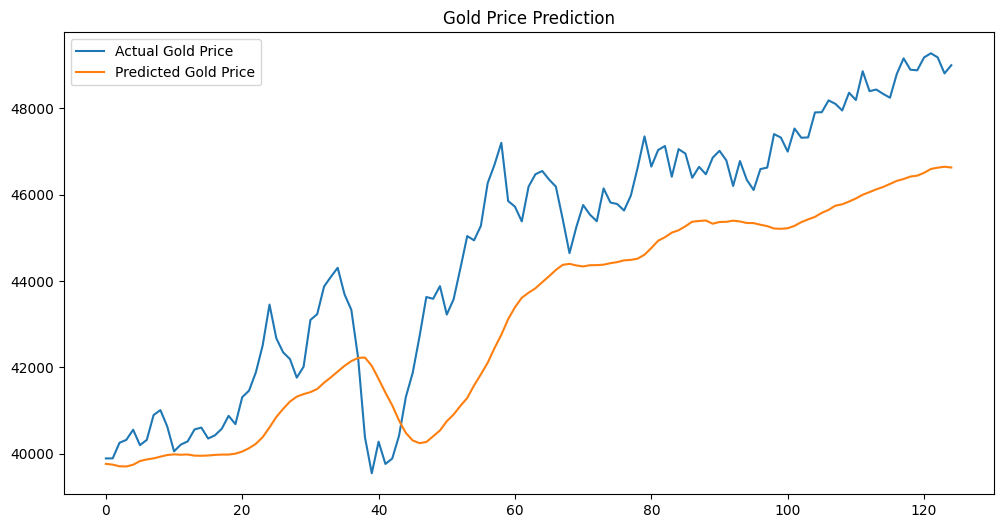

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(actual_prices, label="Actual Gold Price")
plt.plot(predicted_prices, label="Predicted Gold Price")
plt.legend()
plt.title("Gold Price Prediction")
plt.show()

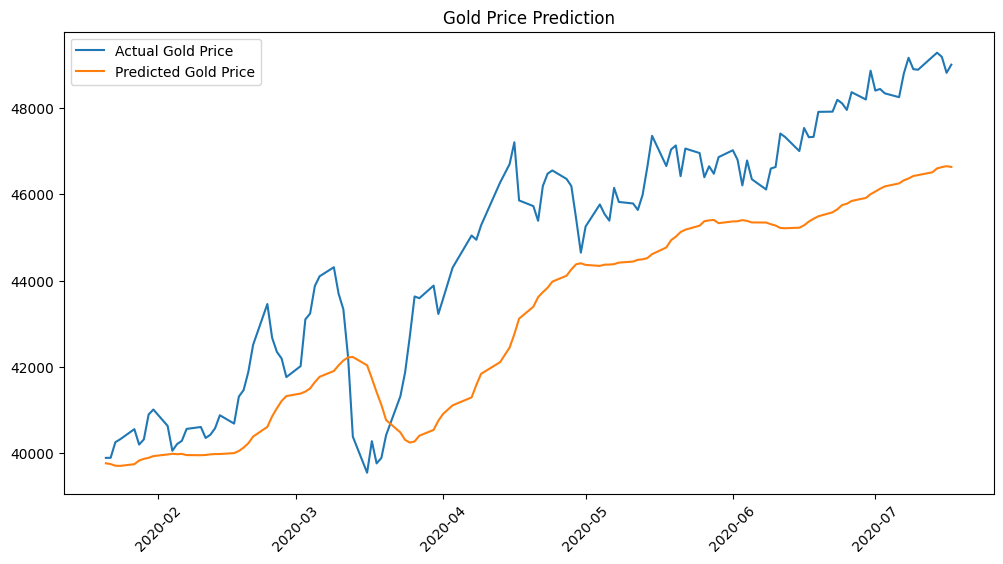

In [36]:
test_dates = df.index[train_size + sequence_length:]

plt.figure(figsize=(12,6))
plt.plot(test_dates, actual_prices, label="Actual Gold Price")
plt.plot(test_dates, predicted_prices, label="Predicted Gold Price")
plt.xticks(rotation=45)
plt.legend()
plt.title("Gold Price Prediction")
plt.show()

In [37]:
model.save("gold_lstm_model.h5")

In [ ]:
import matplotlib.pyplot as plt
print("Matplotlib working 📊")

Matplotlib working 📊


In [38]:
import joblib

joblib.dump(scaler, "scaler.save")

['scaler.save']

In [39]:
import os
print(os.listdir())

['daily_news_features_filtered.csv', 'final_merged_dataset.csv', 'gold_lstm_model.h5', 'gold_prediction.ipynb', 'scaler.save']


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 1987.8861210095868
MAE: 1751.7364917831426


In [ ]:
plt.figure(figsize=(12,6))
plt.plot(actual_prices, label="Actual Gold Price")
plt.plot(predicted_prices, label="Predicted Gold Price")
plt.legend()
plt.title("Gold Price Prediction")
plt.show()

NameError: name 'actual_prices' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

print(scaled_data.shape)


(654, 4)


In [ ]:
import numpy as np

X = []
y = []

window_size = 30

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i])
    y.append(scaled_data[i, 0])  # Gold price column

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (624, 30, 4)
y shape: (624,)


In [ ]:
test_size = 30

X_train = X[:-test_size]
X_test = X[-test_size:]

y_train = y[:-test_size]
y_test = y[-test_size:]

print("Train:", X_train.shape)
print("Test:", X_test.shape)


Train: (594, 30, 4)
Test: (30, 30, 4)


In [ ]:
# Train-Test Split (Time-based)
train_size = int(len(df) * 0.8)

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Scaling (Correct Way)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

feature_cols = ['Gold_Price','USD_Price','avg_sentiment','news_count']


train_scaled = scaler.fit_transform(train_data[feature_cols])
test_scaled = scaler.transform(test_data[feature_cols])

print(train_scaled.shape)
print(test_scaled.shape)


(523, 4)
(131, 4)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


: 

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


NameError: name 'X_train' is not defined

In [ ]:
X_train.shape


NameError: name 'X_train' is not defined

In [ ]:
import numpy as np

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i, 0])  # Gold_Price
    return np.array(X), np.array(y)

window_size = 60

X_train, y_train = create_sequences(train_scaled, window_size)
X_test, y_test = create_sequences(test_scaled, window_size)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


NameError: name 'train_scaled' is not defined

In [ ]:
df = pd.read_csv("final_merged_dataset.csv")

NameError: name 'pd' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

NameError: name 'X_train' is not defined

In [ ]:
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[2], line 1
----> 1 df = pd.read_csv("final_merged_dataset.csv")

NameError: name 'pd' is not defined

X_train.shape

In [ ]:

import tensorflow as tf
print(tf.__version__)

2.20.0


In [ ]:
print("hello")


hello


In [ ]:
X_train.shape


NameError: name 'X_train' is not defined